In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import random
import warnings
warnings.filterwarnings("ignore")

In [23]:
path = os.listdir(r'C:\Users\MyPc\Desktop\chest_xray')

In [24]:
train  = r'C:\Users\MyPc\Desktop\chest_xray\train'
val  = r'C:\Users\MyPc\Desktop\chest_xray\val'
test  = r'C:\Users\MyPc\Desktop\chest_xray\test'

In [25]:
train_n = train + r'\NORMAL'
train_p = train + r'\PNEUMONIA'

In [26]:
rand_n = random.choice(os.listdir(train_n))
rand_p = random.choice(os.listdir(train_p))
image_n = os.path.join(train_n, rand_n)
image_p = os.path.join(train_p, rand_p)

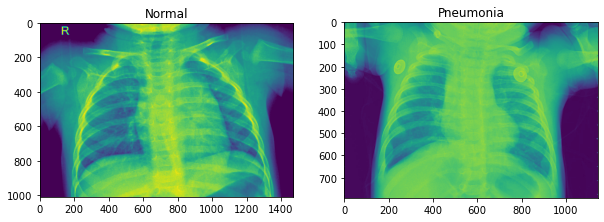

In [27]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.imshow(Image.open(image_n))
plt.title("Normal")

plt.subplot(1, 2, 2)
plt.imshow(Image.open(image_p))
plt.title("Pneumonia")
plt.show();

In [28]:
img = cv2.imread(image_n)
img.shape

(1013, 1472, 3)

In [29]:
import keras
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, BatchNormalization, Flatten

In [30]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape = (64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(activation="relu", units=128))
model.add(Dropout(0.2))
model.add(Dense(activation="sigmoid", units=1))

model.compile(optimizer = "RMSProp", loss= "binary_crossentropy", metrics = ["accuracy"])

In [31]:
batch_size = 32
EPOCHS = 15

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose =1, factor = 0.3, min_lr = 0.000001)

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255,
                  horizontal_flip = True,
                  zoom_range = 0.2,
                  shear_range = 0.2,
                  rotation_range = 45,
                  width_shift_range = 0.1,          
                  height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train, target_size = (64, 64),
                                 batch_size = 32, class_mode = 'binary')

valid_set = test_datagen.flow_from_directory(val, target_size = (64, 64),
                                 batch_size = 32, class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test, target_size = (64, 64),
                                 batch_size = 32, class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
dropout_4 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)       

In [34]:
model.fit(training_set, epochs = EPOCHS, validation_data = valid_set, callbacks= [learning_rate_reduction])

Epoch 1/15
163/163 [==============================] - 172s 1s/step - loss: 0.3511 - accuracy: 0.8558 - val_loss: 7.1219 - val_accuracy: 0.5000
Epoch 2/15
163/163 [==============================] - 166s 1s/step - loss: 0.2537 - accuracy: 0.8970 - val_loss: 11.2644 - val_accuracy: 0.5000
Epoch 3/15
163/163 [==============================] - 171s 1s/step - loss: 0.2211 - accuracy: 0.9093 - val_loss: 16.3089 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/15
163/163 [==============================] - 173s 1s/step - loss: 0.1795 - accuracy: 0.9327 - val_loss: 2.9963 - val_accuracy: 0.5625
Epoch 5/15
163/163 [==============================] - 174s 1s/step - loss: 0.1696 - accuracy: 0.9354 - val_loss: 6.3180 - val_accuracy: 0.5625
Epoch 6/15
163/163 [==============================] - 176s 1s/step - loss: 0.1632 - accuracy: 0.9413 - val_loss: 1.4116 - val_accuracy: 0.5000

Epoch 00006: ReduceLROnPlateau reducing learning rate to 9

In [35]:
train_accuracy = model.evaluate_generator(training_set)

In [36]:
print("Accuracy", train_accuracy[1]*100, "%")

Accuracy 94.24846768379211 %


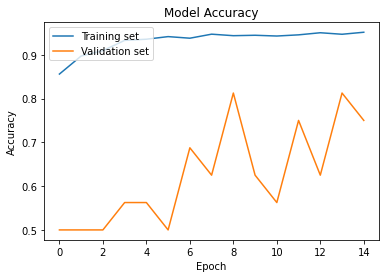

In [37]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Training set', 'Validation set'], loc = 'upper left')
plt.show()


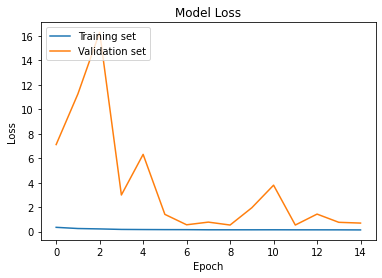

In [38]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Training set', 'Validation set'], loc = 'upper left')
plt.show()

In [39]:
test_accuracy = model.evaluate_generator(test_set)

In [40]:
print("Accuracy", test_accuracy[1]*100, "%")

Accuracy 90.54487347602844 %


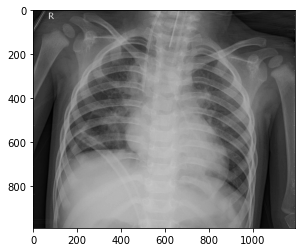

In [41]:
test_path = r'C:\Users\MyPc\Desktop\chest_xray\test\PNEUMONIA'
rand = random.choice(os.listdir(test_path))
image = os.path.join(test_path, rand)
plt.imshow(Image.open(image), cmap='gray');

In [42]:
img = cv2.imread(image)
img = cv2.resize(img,(64,64))
img = np.reshape(img,[1,64,64,3])
cls = model.predict_classes(img)

In [43]:
if cls[0][0] == 1:
    print("Image has Pneumonia")
else:
    print("Image does not have Pneumonia")

Image has Pneumonia
